In [68]:
import numpy as np
import xarray as xr
from kalman_reconstruction import pipeline
from kalman_reconstruction import example_models
from kalman_reconstruction.custom_plot import (
    plot_state_with_probability,
    set_custom_rcParams,
)
import matplotlib.pyplot as plt
set_custom_rcParams()
plt.rcParams["figure.figsize"] = (8, 5)

In [17]:
from importlib import reload

reload(pipeline)

<module 'kalman_reconstruction.pipeline' from 'C:\\Users\\Niebaum\\Documents\\Repositories\\kalman-reconstruction-partially-observered-systems\\kalman_reconstruction\\pipeline.py'>

In [202]:
seed = 39264
variance = 5
nb_iter_SEM = 30
dt = 0.001
number_loops = 4
model_result = example_models.Lorenz_63_xarray(dt=dt, time_length=number_loops, time_steps=None)

rng1 = np.random.default_rng(seed=seed)
rng2 = np.random.default_rng(seed=seed + 1)
rng3 = np.random.default_rng(seed=seed + 2)
rng4 = np.random.default_rng(seed=seed + 3)

In [203]:

data = dict()
result = dict()
smoothed= dict()

### Apply the Kalman SEM using latent variables 


#### 0 latent variables

100%|██████████| 30/30 [01:29<00:00,  2.98s/it]


<xarray.DataArray 'M' (state_name: 2, state_name_copy: 2)>
array([[ 1.00038796e+00, -3.49993247e-04],
       [ 2.86951840e-03,  9.99454927e-01]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3'

<xarray.DataArray 'Q' (state_name: 2, state_name_copy: 2)>
array([[ 0.00446628, -0.00014383],
       [-0.00014383,  0.00627358]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3'

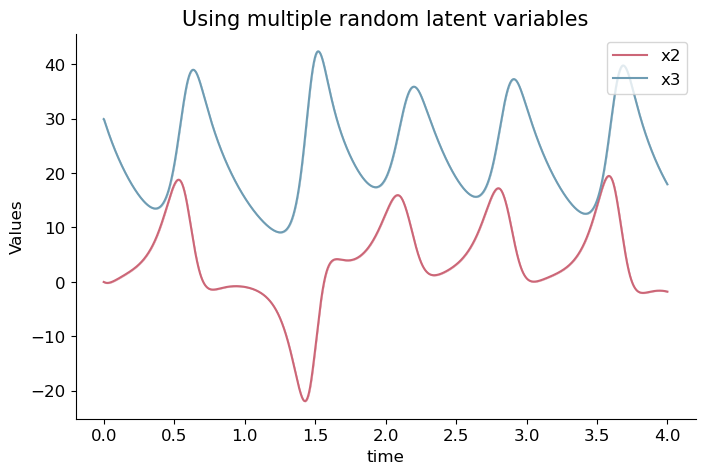

In [204]:
new_name = "0_latent"

data[new_name] = model_result.copy()
# Run Klman_SEM
result[new_name] = pipeline.xarray_Kalman_SEM(
    ds=data[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001,
)

fig, ax = plt.subplots(1, 1)
for var in result[new_name].state_name:
    plot_state_with_probability(
        ax=ax,
        x_value=result[new_name].time,
        state=result[new_name].states.sel(state_name=var),
        prob=result[new_name].covariance.sel(state_name=var, state_name_copy=var),
        line_kwargs={"label": var.values},
    )

ax.legend()
#ax.set_xlim((0, 2))
ax.set_xlabel("time")
ax.set_ylabel("Values")
ax.set_title("Using multiple random latent variables");


#### 1 latent variables

100%|██████████| 30/30 [01:23<00:00,  2.77s/it]


<xarray.DataArray 'M' (state_name: 3, state_name_copy: 3)>
array([[ 1.00040518e+00, -3.52495105e-04,  5.83053425e-04],
       [ 2.64151354e-03,  9.99483599e-01, -7.90964690e-03],
       [-3.05071515e-03,  1.63417614e-03,  9.83195193e-01]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3' 'z1'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3' 'z1'

<xarray.DataArray 'Q' (state_name: 3, state_name_copy: 3)>
array([[ 4.43222232e-03,  2.86573602e-04,  1.48541567e-04],
       [ 2.86573602e-04,  2.48479223e-04, -1.24255881e-02],
       [ 1.48541567e-04, -1.24255881e-02,  3.15979273e+00]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3' 'z1'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3' 'z1'

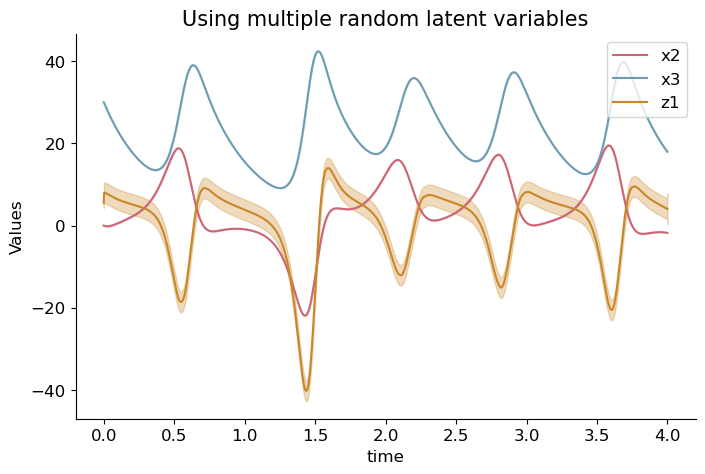

In [205]:
old_name = "0_latent"
new_name = "1_latent"

data[new_name] = data[old_name].copy()
# Add latent variable
pipeline.add_random_variable(
    data[new_name], var_name="z1", random_generator=rng1, variance=variance
)
# Run Klman_SEM
result[new_name] = pipeline.xarray_Kalman_SEM(
    ds=data[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3", "z1"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001
)

fig, ax = plt.subplots(1, 1)
for var in result[new_name].state_name:
    plot_state_with_probability(
        ax=ax,
        x_value=result[new_name].time,
        state=result[new_name].states.sel(state_name=var),
        prob=result[new_name].covariance.sel(state_name=var, state_name_copy=var),
        line_kwargs={"label": var.values},
    )

ax.legend()
#ax.set_xlim((0, 2))
ax.set_xlabel("time")
ax.set_ylabel("Values")
ax.set_title("Using multiple random latent variables");

display(result[new_name].M)
display(result[new_name].Q)

In [206]:
display(result["1_latent"].M)
display(result["1_latent"].Q)

<xarray.DataArray 'M' (state_name: 3, state_name_copy: 3)>
array([[ 1.00040518e+00, -3.52495105e-04,  5.83053425e-04],
       [ 2.64151354e-03,  9.99483599e-01, -7.90964690e-03],
       [-3.05071515e-03,  1.63417614e-03,  9.83195193e-01]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3' 'z1'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3' 'z1'

<xarray.DataArray 'Q' (state_name: 3, state_name_copy: 3)>
array([[ 4.43222232e-03,  2.86573602e-04,  1.48541567e-04],
       [ 2.86573602e-04,  2.48479223e-04, -1.24255881e-02],
       [ 1.48541567e-04, -1.24255881e-02,  3.15979273e+00]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3' 'z1'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3' 'z1'

#### 2 latent variables

100%|██████████| 30/30 [01:26<00:00,  2.88s/it]


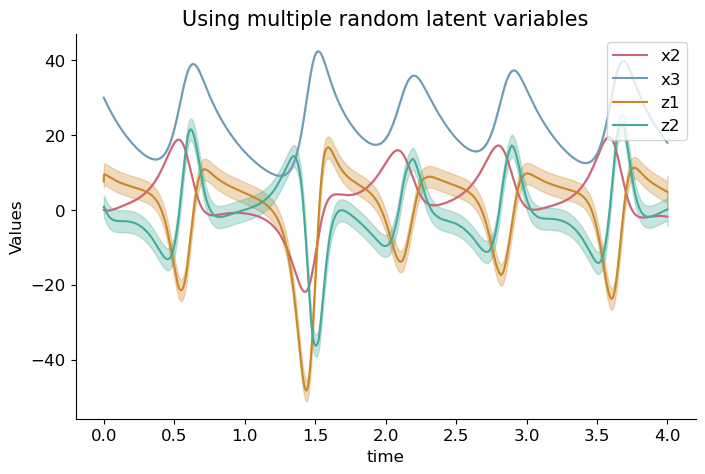

In [207]:
old_name = "1_latent"
new_name = "2_latent"

data[new_name] = data[old_name].copy()
data[new_name]["z1"] = result[old_name].states.sel(state_name="z1")
# Add latent variable
pipeline.add_random_variable(
    data[new_name], var_name="z2", random_generator=rng1, variance=variance
)
# Run Klman_SEM
result[new_name] = pipeline.xarray_Kalman_SEM(
    ds=data[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3", "z1", "z2"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001,
)

fig, ax = plt.subplots(1, 1)
for var in result[new_name].state_name:
    plot_state_with_probability(
        ax=ax,
        x_value=result[new_name].time,
        state=result[new_name].states.sel(state_name=var),
        prob=result[new_name].covariance.sel(state_name=var, state_name_copy=var),
        line_kwargs={"label": var.values},
    )

ax.legend()
#ax.set_xlim((0, 2))
ax.set_xlabel("time")
ax.set_ylabel("Values")
ax.set_title("Using multiple random latent variables");

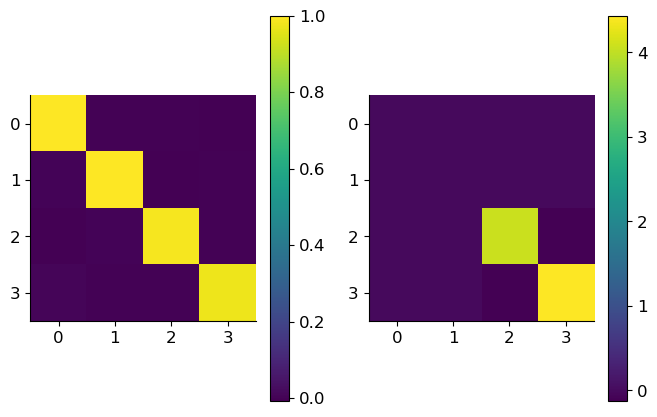

In [208]:
fig, axs = plt.subplots(nrows = 1, ncols = 2)
mpl = axs[0].imshow(result["2_latent"].M)
fig.colorbar(ax=axs[0], mappable = mpl)
mpl = axs[1].imshow(result["2_latent"].Q)
fig.colorbar(ax=axs[1], mappable = mpl)

In [209]:
display(result["2_latent"].M)
display(result["2_latent"].Q)

<xarray.DataArray 'M' (state_name: 4, state_name_copy: 4)>
array([[ 1.00018235e+00, -3.67110630e-04,  3.61380567e-04,
        -6.73473396e-03],
       [ 2.82018412e-03,  9.99489676e-01, -6.68635076e-03,
        -4.66017922e-04],
       [-3.03719628e-03,  1.89643660e-03,  9.84574607e-01,
         5.42908228e-04],
       [ 8.90991190e-03, -1.48540773e-03, -2.20253454e-04,
         9.75849447e-01]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3' 'z1' 'z2'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3' 'z1' 'z2'

<xarray.DataArray 'Q' (state_name: 4, state_name_copy: 4)>
array([[ 2.30511437e-04, -3.85624165e-06,  1.20200553e-03,
        -1.59646356e-02],
       [-3.85624165e-06,  2.14235803e-04, -1.38152370e-02,
        -2.75231290e-04],
       [ 1.20200553e-03, -1.38152370e-02,  4.07215593e+00,
        -1.23326044e-01],
       [-1.59646356e-02, -2.75231290e-04, -1.23326044e-01,
         4.43536000e+00]])
Coordinates:
  * state_name       (state_name) <U2 'x2' 'x3' 'z1' 'z2'
  * state_name_copy  (state_name_copy) <U2 'x2' 'x3' 'z1' 'z2'

#### 3 latent variables

In [210]:
# old_name = "2_latent"
# new_name = "3_latent"

# data[new_name] = data[old_name].copy()
# data[new_name]["z2"] = result[old_name].states.sel(state_name="z2")
# # Add latent variable
# pipeline.add_random_variable(
#     data[new_name], var_name="z3", random_generator=rng1, variance=variance
# )
# # Run Klman_SEM
# result[new_name] = pipeline.xarray_Kalman_SEM(
#     ds=data[new_name],
#     observation_variables=["x2", "x3"],
#     state_variables=["x2", "x3", "z1", "z2", "z3"],
#     nb_iter_SEM=nb_iter_SEM,
#     variance_obs_comp=0.0001,
# )

# fig, ax = plt.subplots(1, 1)
# for var in result[new_name].state_name:
#     plot_state_with_probability(
#         ax=ax,
#         x_value=result[new_name].time,
#         state=result[new_name].states.sel(state_name=var),
#         prob=result[new_name].covariance.sel(state_name=var, state_name_copy=var),
#         line_kwargs={"label": var.values},
#     )

# ax.legend()
# #ax.set_xlim((0, 2))
# ax.set_xlabel("time")
# ax.set_ylabel("Values")
# ax.set_title("Using multiple random latent variables");

## Test the forecast skill
To test the forecast skill, we will create a test dataset starting from the end of the initial training data.

In [227]:
test_initial_condition = np.array([model_result[var].isel(time = -1).values for var in ["x1", "x2", "x3"]])
test_initial_condition

array([-0.83611822, -1.77794423, 17.937048  ])

In [228]:
model_result_test = example_models.Lorenz_63_xarray(
    dt=dt, 
    time_length=number_loops,
    time_steps=None,
    initial_condition = test_initial_condition)


In [229]:
data_test = dict()
kalman_test = dict()
smoother_test = dict()

Perform Kalman SEM

In [231]:
'''0 Latent'''

new_name = "0_latent"
data_test[new_name] = model_result_test.copy()
# Run Klman_SEM
kalman_test[new_name] = pipeline.xarray_Kalman_SEM(
    ds=data_test[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001,
)


'''1 Latent'''
old_name = "0_latent"
new_name = "1_latent"
# copy dataset
data_test[new_name] = data_test[old_name].copy()
# Add latent variable
pipeline.add_random_variable(
    data_test[new_name], var_name="z1", random_generator=rng1, variance=variance
)
# Run Klman_SEM
kalman_test[new_name] = pipeline.xarray_Kalman_SEM(
    ds=data_test[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3", "z1"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001
)

'''2 Latent'''
old_name = "1_latent"
new_name = "2_latent"
# copy dataset
data_test[new_name] = data_test[old_name].copy()
data_test[new_name]["z1"] = kalman_test[old_name].states.sel(state_name="z1")
# Add latent variable
pipeline.add_random_variable(
    data_test[new_name], var_name="z2", random_generator=rng1, variance=variance
)
# Run Klman_SEM
kalman_test[new_name] = pipeline.xarray_Kalman_SEM(
    ds=data_test[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3", "z1", "z2"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001
)


100%|██████████| 30/30 [01:50<00:00,  3.68s/it]


Perform Kalman smoother using the last timestep as start.
The ``M`` and ``Q`` Matrices from the ``Kalman_SEM`` are used.

In [232]:
idx = -1
'''0 Latent'''
H, R = pipeline._input_matrices_H_R_from_n_p(n=2, p=2)
smoother_test["0_latent"] = pipeline.xarray_Kalman_smoother(
    ds=data_test["0_latent"],
    state_variables=["x2", "x3"],
    observation_variables=["x2", "x3"],
    initial_covariance_matrix=kalman_test["0_latent"].covariance.isel(time=idx),
    M=kalman_test["0_latent"].M.values,
    Q=kalman_test["0_latent"].Q.values,
    H=H,
    R=R,
    estimation_idx=idx,
    dim="time",
)

'''1 Latent'''
idx = -1
H, R = pipeline._input_matrices_H_R_from_n_p(n=3, p=2)
smoother_test["1_latent"] = pipeline.xarray_Kalman_smoother(
    ds=data_test["1_latent"],
    state_variables=["x2", "x3", "z1"],
    observation_variables=["x2", "x3"],
    initial_covariance_matrix=kalman_test["1_latent"].covariance.isel(time=idx),
    M=kalman_test["1_latent"].M.values,
    Q=kalman_test["1_latent"].Q.values,
    H=H,
    R=R,
    estimation_idx=idx,
    dim="time",
)

'''2 Latent'''
H, R = pipeline._input_matrices_H_R_from_n_p(n=4, p=2)
smoother_test["2_latent"] = pipeline.xarray_Kalman_smoother(
    ds=data_test["2_latent"],
    state_variables=["x2", "x3", "z1", "z2"],
    observation_variables=["x2", "x3"],
    initial_covariance_matrix=kalman_test["2_latent"].covariance.isel(time=idx),
    M=kalman_test["2_latent"].M.values,
    Q=kalman_test["2_latent"].Q.values,
    H=H,
    R=R,
    estimation_idx=idx,
    dim="time",
)


It seems the order of the variabels is not fixed. Need to fix it

In [236]:
horizon_length = 30

res = kalman_test["2_latent"]
smo = smoother_test["2_latent"]
hor = xr.Dataset(coords = res.coords)
hor = hor.assign_coords(
    horizon = np.arange(horizon_length)
    )
pipeline.add_empty_dataarrays(hor, res, new_dimension="horizon")
res = pipeline.expand_and_assign_coords(res, hor)
hor = hor.transpose("horizon", "time", "state_name", ...)
pipeline.assign_variables_by_double_selection(
    ds1 = hor, 
    ds2= res, 
    select_dict1=dict(horizon=0),
    select_dict2=dict())



In [184]:

for horiz in range(0, len(hor.horizon) -1) :
    if horiz == 0:
        temp = smo.state_smooth 
        pipeline.assign_variable_by_double_selection(
            ds1 = hor, 
            da2= temp,
            var_name = "states",
            select_dict1=dict(horizon=horiz),
            select_dict2=dict())

    temp = hor.states.sel(horizon = horiz).values @ res.M.values
    
    hor["states"][dict(horizon = horiz+1)] = temp
    # pipeline.assign_variable_by_double_selection(
    #     ds1 = hor, 
    #     da2= temp,
    #     var_name = "states",
    #     select_dict1=dict(horizon=horiz+1),
    #     select_dict2=dict())
    if horiz == 0:
        temp = smo.covariance_smooth 
        pipeline.assign_variable_by_double_selection(
            ds1 = hor, 
            da2= temp,
            var_name = "covariance",
            select_dict1=dict(horizon=horiz),
            select_dict2=dict())
    temp = res.M.values @ hor.covariance.sel(horizon = horiz).values @ res.M.T.values + res.Q.values
    hor["covariance"][dict(horizon = horiz+1)] = temp
    # pipeline.assign_variable_by_double_selection(
    #     ds1 = hor, 
    #     da2= temp,
    #     var_name = "covariance",
    #     select_dict1=dict(horizon=horiz+1),
    #     select_dict2=dict())


Text(0.5, 0, 'Time')

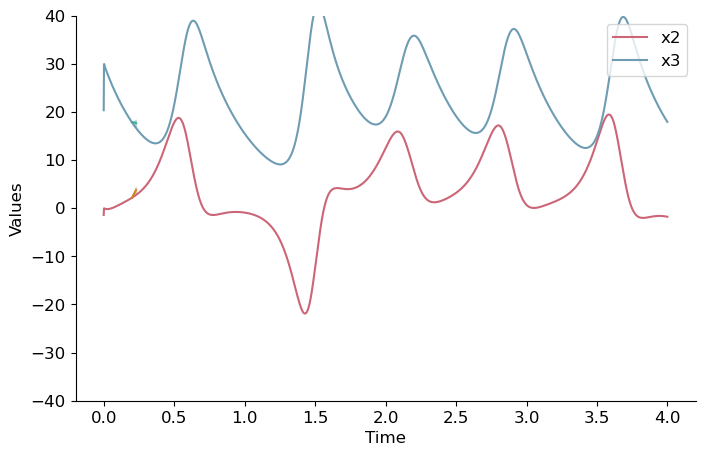

In [185]:
from kalman_reconstruction.custom_plot import plot_state_with_probability

start_time = 200
varibales_to_plot = ["x2", "x3"]

fig, ax = plt.subplots(1,1)

ax.plot(
    hor.time, 
    hor.states.isel(horizon = 0).sel(state_name = varibales_to_plot), 
    label = hor.state_name.sel(state_name = varibales_to_plot).values
    )
for state in varibales_to_plot:
    plot_state_with_probability(
        ax=ax,
        x_value = (start_time + hor.horizon) * dt,
        state=hor.states.sel(state_name = state).isel(time = start_time),
        prob=hor.covariance.sel(state_name = state, state_name_copy = state).isel(time = start_time),
        stds=0.64,
    )

ax.legend()
ax.set_ylim(-40,40)
ax.set_ylabel("Values")
ax.set_xlabel("Time")

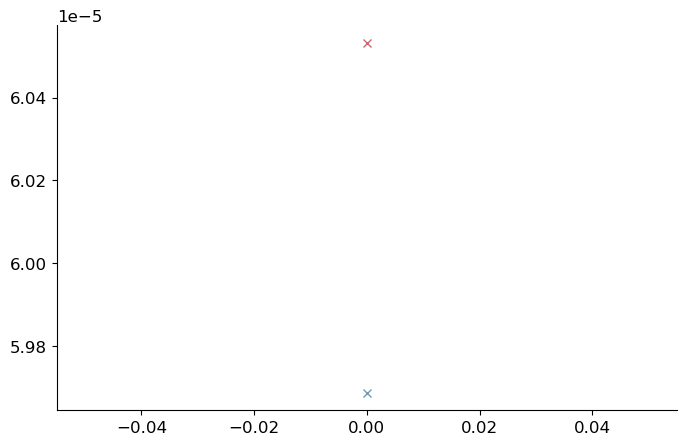

In [179]:
fig, ax = plt.subplots(1,1)
start_time = 100
for state in ["x2", "x3"]:
    ax.plot(
        hor.horizon.isel(horizon=slice(0,20)),
        hor.covariance.isel(horizon=slice(0,20)).sel(state_name = state, state_name_copy = state).isel(time = start_time),
    linestyle = "-",
    marker="x"
    )


In [187]:
print(
    res.M.values @
    hor.covariance.isel(time = 100, horizon = 1).values
    @ res.M.T.values)

[[ 1.02117966e-03  1.70488565e-05  3.52497384e-03  6.80641054e-02]
 [ 1.70488565e-05  1.06926073e-03 -7.25975583e-02  5.05067950e-03]
 [ 3.52497384e-03 -7.25975583e-02  6.41287217e+00  4.70059757e-03]
 [ 6.80641054e-02  5.05067950e-03  4.70059757e-03  6.00840327e+00]]


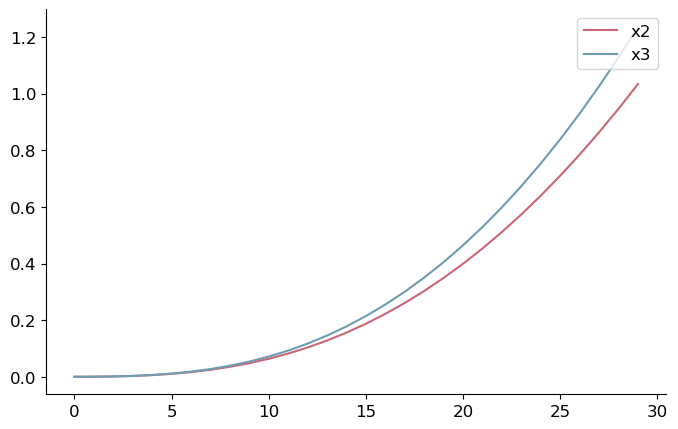

In [193]:
plt.plot(hor.covariance.isel(time = 100).sel(state_name = ["x2"], state_name_copy = ["x2"]).squeeze(), label = "x2")
plt.plot(hor.covariance.isel(time = 100).sel(state_name = ["x3"], state_name_copy = ["x3"]).squeeze(), label = "x3")
plt.legend()

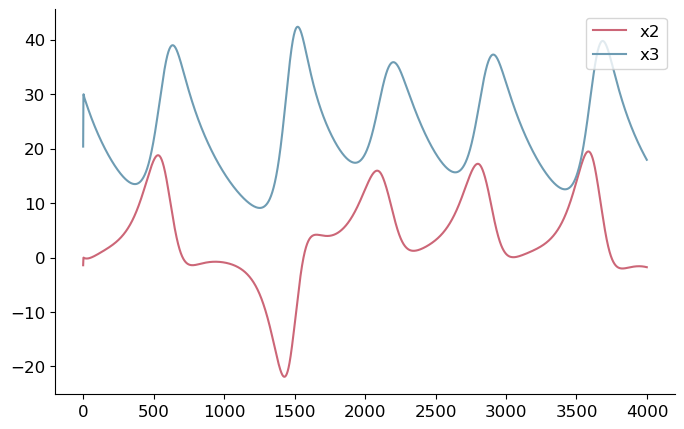

In [197]:
plt.plot(hor.states.isel(horizon = 0).sel(state_name = ["x2"]).squeeze(), label = "x2")
plt.plot(hor.states.isel(horizon = 0).sel(state_name = ["x3"]).squeeze(), label = "x3")
plt.legend()

In [65]:
result["0_latent"].M

KeyError: '0_latent'